# Load all required libraries

In [2]:

# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Run before importing KMeans
import os
os.environ["OMP_NUM_THREADS"] = '1'

# Loading the dataset

In [4]:
#converting the dataset from T delimeter to coma delimeter 
def load_and_save_dataset():
    dataset = pd.read_csv('marketing_campaign.csv', delimiter='\t')
    dataset.to_csv('Marketing_Campaign_Resaved.csv', index=False)
    df = pd.read_csv('Marketing_Campaign_Resaved.csv')
    return df

df = load_and_save_dataset()

# Preprocessing and EDA

In [6]:
#step 3 learning the dataset and preprocessing 
print (df.shape)

(2240, 29)


In [7]:
# checking for null values and filling the null values with mode 
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Income    24
dtype: int64


In [8]:
#Fill missing values in the column with the median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Verify that there are no more missing values
missing_values = df.isnull().sum()
print(missing_values)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [9]:
#Extracting date from Dt_Custormer
df['date'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True).dt.date

# Convert the unique dates to strings for a more readable format
unique_dates_str = [date.strftime('%Y-%m-%d') for date in df['date'].unique()]

In [10]:
#Dropping irrelevant columns to our analysis 
columns_to_drop = ['ID','Kidhome','Teenhome','Recency','Z_CostContact','Complain','Z_Revenue','Dt_Customer']
df = df.drop(columns=columns_to_drop)

In [11]:
df.describe()

,Year_Birth,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107
std,11.984069,25037.955891,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


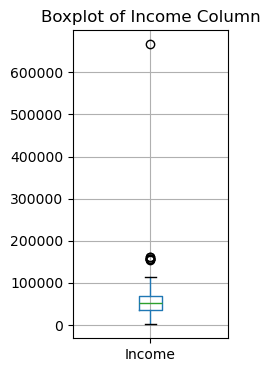

In [12]:
#there is a visible outlier in the income column 
#we can confirm this with a Boxplot, this could be 
#as a result of a wealthy purchasing habits 

plt.figure(figsize=(2, 4))
df.boxplot(column=['Income'])
plt.title("Boxplot of Income Column")
plt.show()

In [13]:
#checking the Data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   MntWines             2240 non-null   int64  
 5   MntFruits            2240 non-null   int64  
 6   MntMeatProducts      2240 non-null   int64  
 7   MntFishProducts      2240 non-null   int64  
 8   MntSweetProducts     2240 non-null   int64  
 9   MntGoldProds         2240 non-null   int64  
 10  NumDealsPurchases    2240 non-null   int64  
 11  NumWebPurchases      2240 non-null   int64  
 12  NumCatalogPurchases  2240 non-null   int64  
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   int64  
 15  AcceptedCmp3         2240 non-null   i

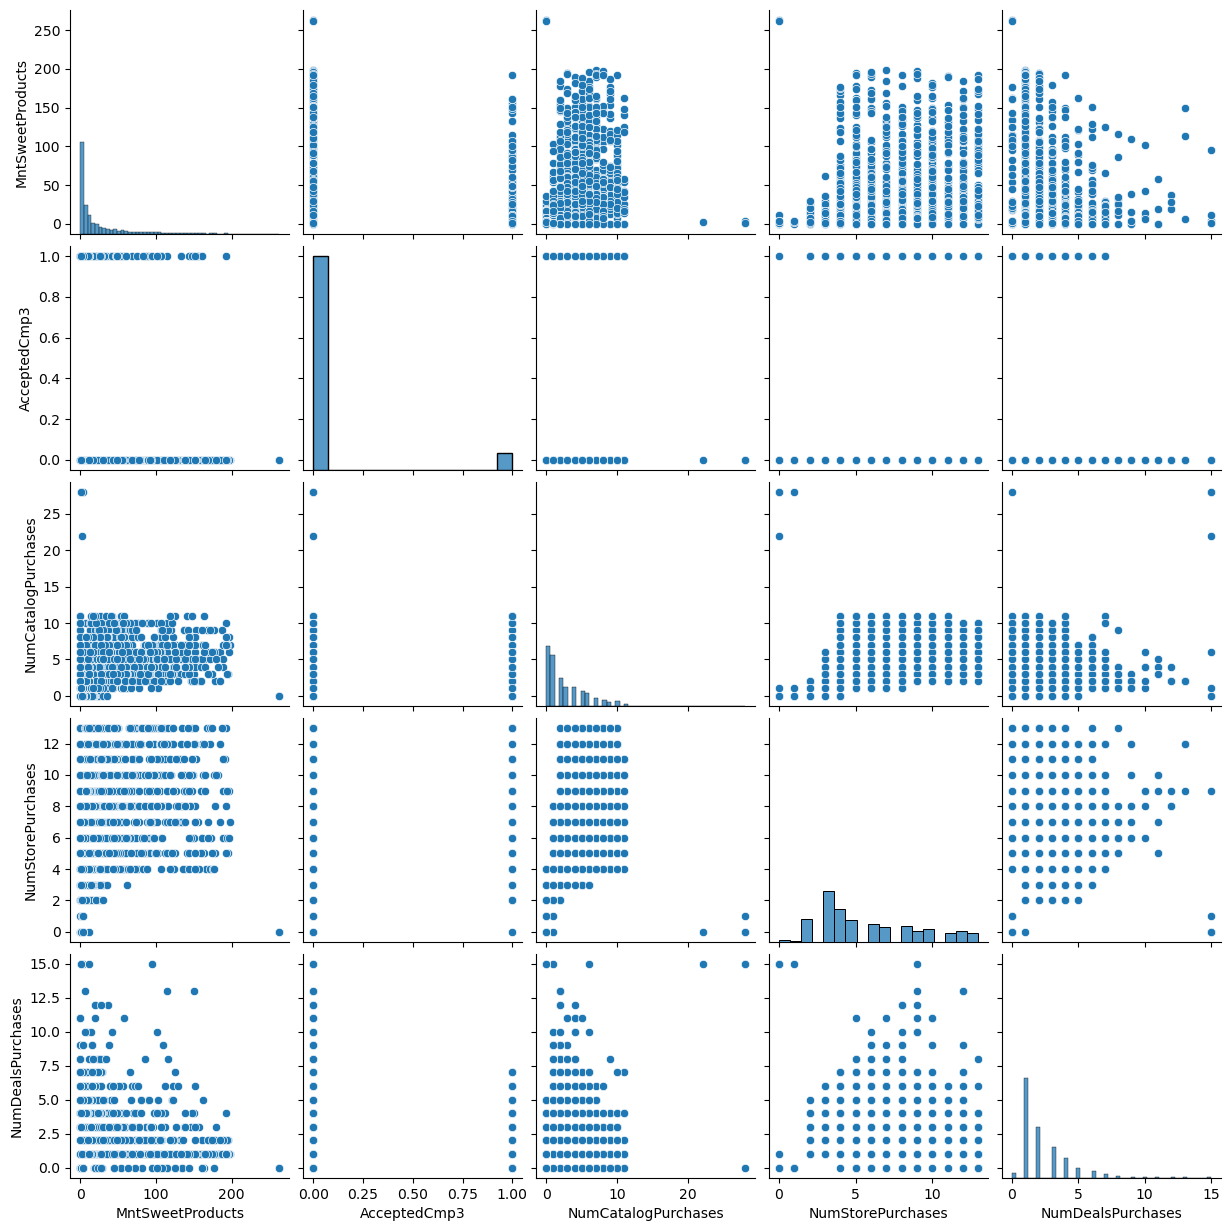

In [14]:
#visualizing some numerical columns using iloc
sns.pairplot(df.iloc[:,[8, 15, 12, 13, 10]])


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# List of categorical columns you want to encode (replace with your actual column names)
categorical_columns = ['Education', 'Marital_Status']  # Example column names, update as needed

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [16]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Select the columns by their index positions
X = df.iloc[:, [8, 10, 12, 13, 15]].values  # Selecting columns by index

# Initialize the StandardScaler
sc_X = StandardScaler()

# Scale the selected data (fit and transform)
X_scaled = sc_X.fit_transform(X)

# Employing The K-Means 

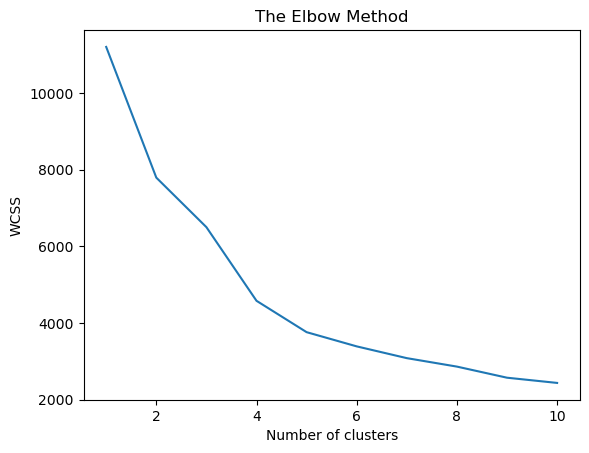

In [18]:
# Using the elbow method to find the optimal number of clusters

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Apply KMeans clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Display the cluster assignments
y_kmeans


array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

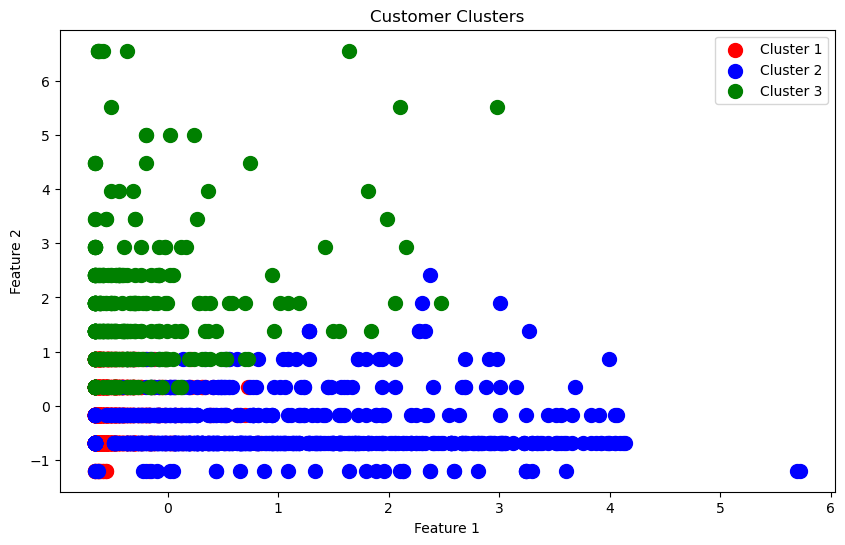

In [20]:
# Visualize the customer clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0][:, 0], X_scaled[y_kmeans == 0][:, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1][:, 0], X_scaled[y_kmeans == 1][:, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2][:, 0], X_scaled[y_kmeans == 2][:, 1], s=100, c='green', label='Cluster 3')
plt.title('Customer Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Employing Hierarchical Clustering Using the Agglomerative (Bottom-Up) Approach

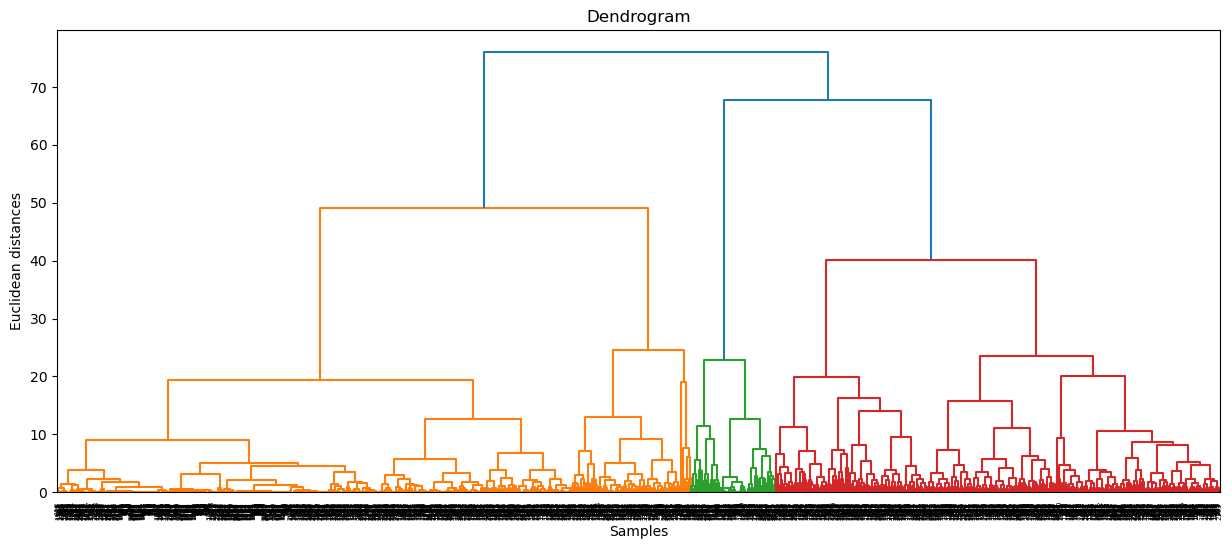

In [22]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

#use the scaled data (X_scaled) instead of the original data (X) to ensure consistency and accuracy in your clustering visualization.
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [23]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_scaled)

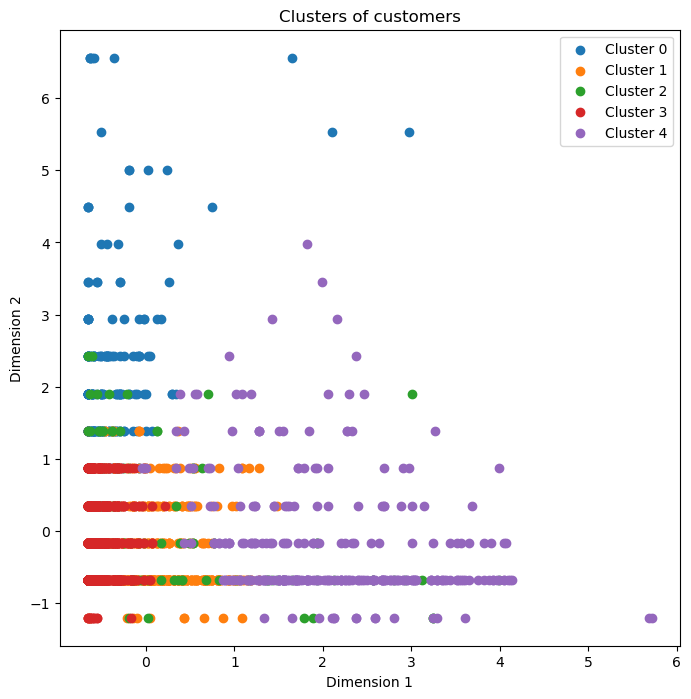

In [24]:
#use the scaled data (X_scaled) instead of the original data (X) to ensure consistency and accuracy in your clustering visualization.
# Visualising the clusters
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], label='Cluster 0')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], label='Cluster 1')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], label='Cluster 2')
plt.scatter(X_scaled[y_hc == 3, 0], X_scaled[y_hc == 3, 1], label='Cluster 3')
plt.scatter(X_scaled[y_hc == 4, 0], X_scaled[y_hc == 4, 1], label='Cluster 4')

plt.title('Clusters of customers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

#  To reduce dimensionality in our dataset we employ PCA for K-Means 

In [26]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Print the sum of the explained variance ratio
sum_explained_variance_ratio = sum(explained_variance_ratio)
print("Sum of explained variance ratio:", sum_explained_variance_ratio)

Explained variance ratio: [0.39492545 0.21233566]
Sum of explained variance ratio: 0.607261113608085


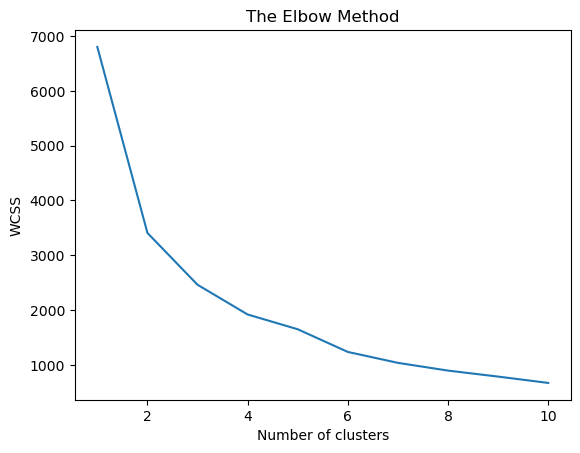

In [27]:
# Apply KMeans clustering using the reduced data (X_reduced)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)
    
# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# Apply K-means clustering with the optimal number of clusters (let's assume it's 3 for this example)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_reduced)
# Display the cluster assignments
y_kmeans


array([1, 0, 2, ..., 1, 1, 0], dtype=int32)

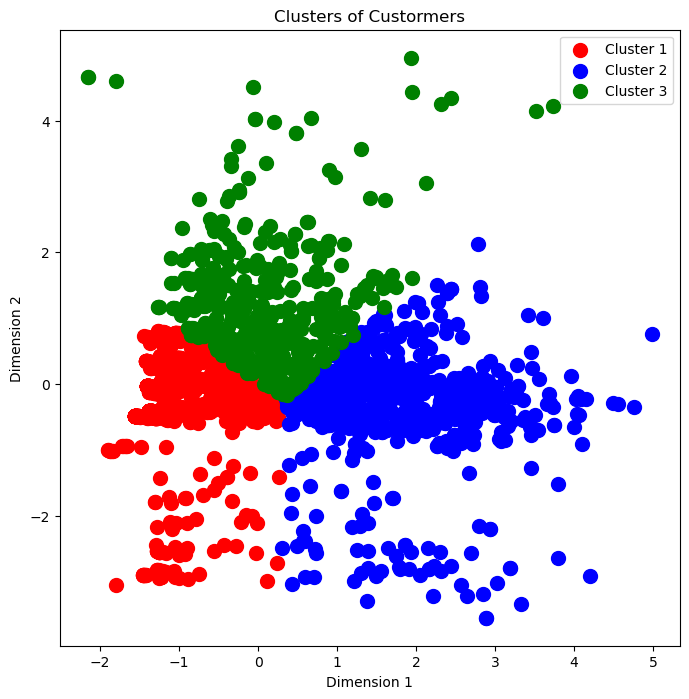

In [29]:
# Visualize the customer clusters (using the reduced dimensions)
colours = ['red', 'blue', 'green']
plt.figure(figsize=(8, 8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1], s=100, c=colours[i], label='Cluster '+str(i+1))
plt.title('Clusters of Custormers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# PCA for Hierarchical Clustering Using the Agglomerative (Bottom-Up) Approach¶

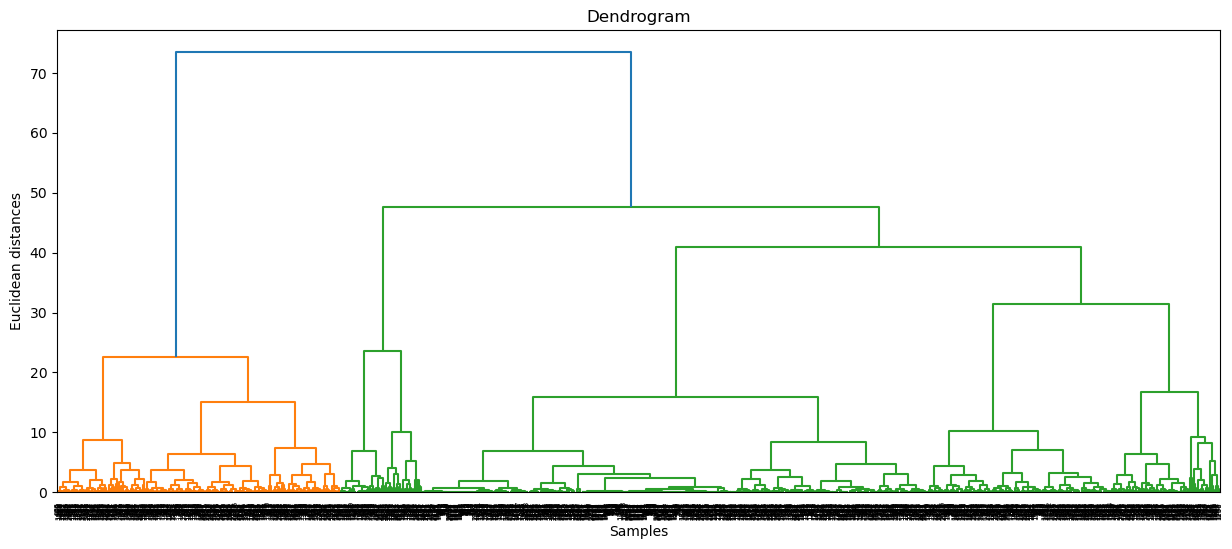

In [31]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering

# Fitting Hierarchical Clustering to the reduced dataset
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_reduced)

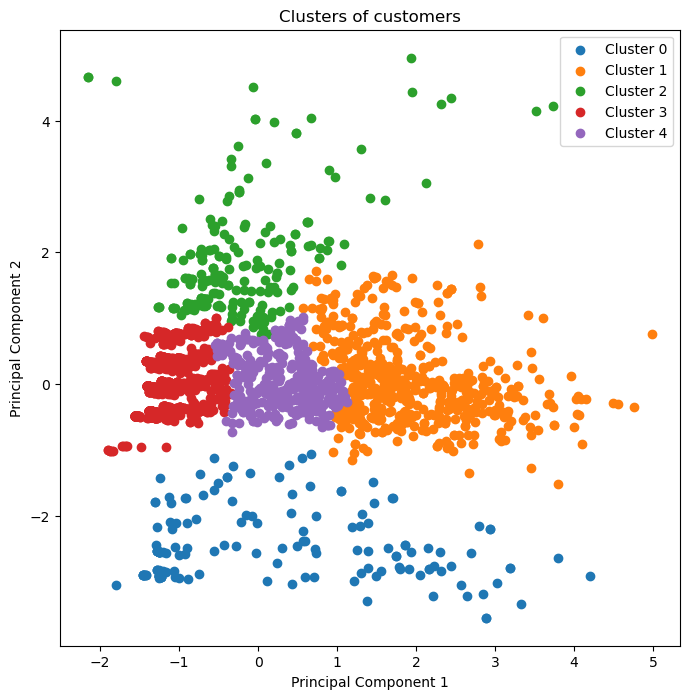

In [33]:
# Visualising the clusters using the reduced data (X_reduced)
plt.figure(figsize=(8, 8))
plt.scatter(X_reduced[y_hc == 0, 0], X_reduced[y_hc == 0, 1], label='Cluster 0')
plt.scatter(X_reduced[y_hc == 1, 0], X_reduced[y_hc == 1, 1], label='Cluster 1')
plt.scatter(X_reduced[y_hc == 2, 0], X_reduced[y_hc == 2, 1], label='Cluster 2')
plt.scatter(X_reduced[y_hc == 3, 0], X_reduced[y_hc == 3, 1], label='Cluster 3')
plt.scatter(X_reduced[y_hc == 4, 0], X_reduced[y_hc == 4, 1], label='Cluster 4')

plt.title('Clusters of customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Model Comparison using silhouette scores

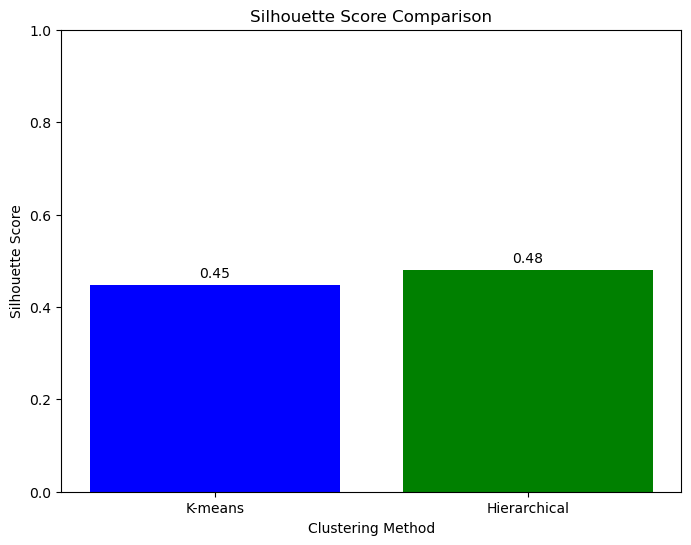

In [35]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster


# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_reduced)
silhouette_kmeans = silhouette_score(X_reduced, kmeans_labels)

# Hierarchical clustering
hc = linkage(X_reduced, method='ward')
hc_labels = fcluster(hc, t=3, criterion='maxclust')
silhouette_hc = silhouette_score(X_reduced, hc_labels)

# Silhouette Scores for K-means and Hierarchical Clustering
silhouette_scores = [silhouette_kmeans, silhouette_hc]
methods = ['K-means', 'Hierarchical']

# Plot the Silhouette Scores as a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(methods, silhouette_scores, color=['blue', 'green'])

# Add the silhouette score values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.title('Silhouette Score Comparison')
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
plt.show()

# Purpose of the study task 1
# Analyzing key demographic and behavioral factors in relation to customer response levels to marketing campaigns.

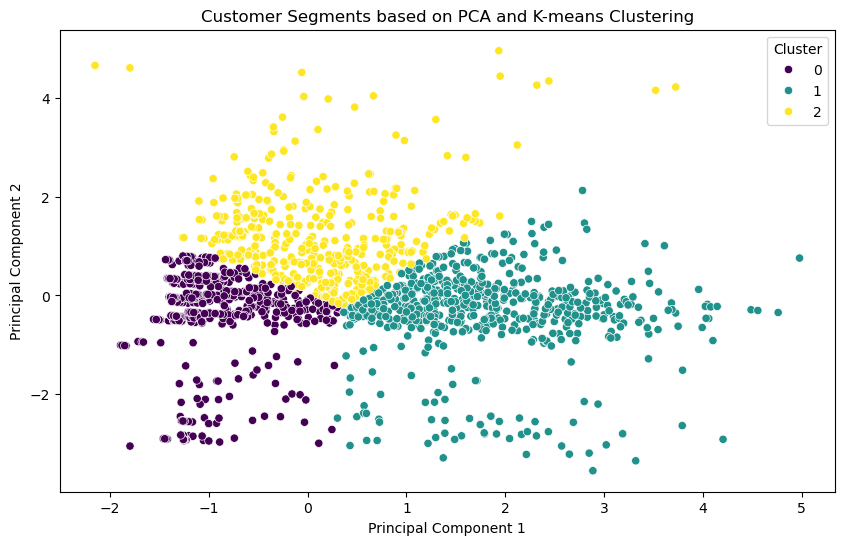

                      Year_Birth  Education  Marital_Status        Income  \
Cluster                                                                     
High Responders      1970.609756   2.308943        3.736224  38235.145890   
Low Responders       1966.004320   2.570194        3.708423  55464.172786   
Moderate Responders  1967.761194   2.411940        3.734328  73144.547015   

                       MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                        
High Responders       80.640470   7.093948        37.308943        10.242096   
Low Responders       401.803456  21.568035       140.326134        28.609071   
Moderate Responders  605.241791  61.310448       399.546269        88.765672   

                     MntSweetProducts  MntGoldProds  ...  NumWebPurchases  \
Cluster                                              ...                    
High Responders              5.392954     20.958446  ...   

In [37]:
# Create a DataFrame with the PCA components and cluster assignments
df_clusters = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=df_clusters)
plt.title('Customer Segments based on PCA and K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Merge the cluster assignments with the original dataset
df['Cluster'] = y_kmeans

# Rename clusters based on their characteristics
cluster_names = {0: 'High Responders', 1: 'Moderate Responders', 2: 'Low Responders'}
df['Cluster'] = df['Cluster'].map(cluster_names)

# Profile clusters by calculating the mean values of the original features within each cluster, excluding the 'date' column
cluster_profiles = df.drop(columns=['date']).groupby('Cluster').mean()

print(cluster_profiles)

# 2. Examining and profiling the demographic and behavioral characteristics of customers and their responds to marketing campaigns.


In [39]:
# Identify non-responders
df['Non_Responder'] = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) == 0).astype(int)

# Map marital status using a dictionary
marital_status_map = {3: 'Married', 2: 'Married', 4: 'Divorced', 5: 'Widow'}
df['Marital_Status'] = df['Marital_Status'].map(marital_status_map).fillna('Single')

# Create age groups
df['Age_Group'] = pd.cut(df['Year_Birth'], bins=[1900, 1965, 1985, 2005], labels=['Old', 'Middle Age', 'Young'])

# Map educational levels 
education_map = {1: 'Basic', 2: 'High School', 3: 'Graduation', 4: 'Post-Graduation'}
df['Education'] = df['Education'].map(education_map)

# Filter non-responders and responders
non_responders = df[df['Non_Responder'] == 1]
responders = df[df['Non_Responder'] == 0]


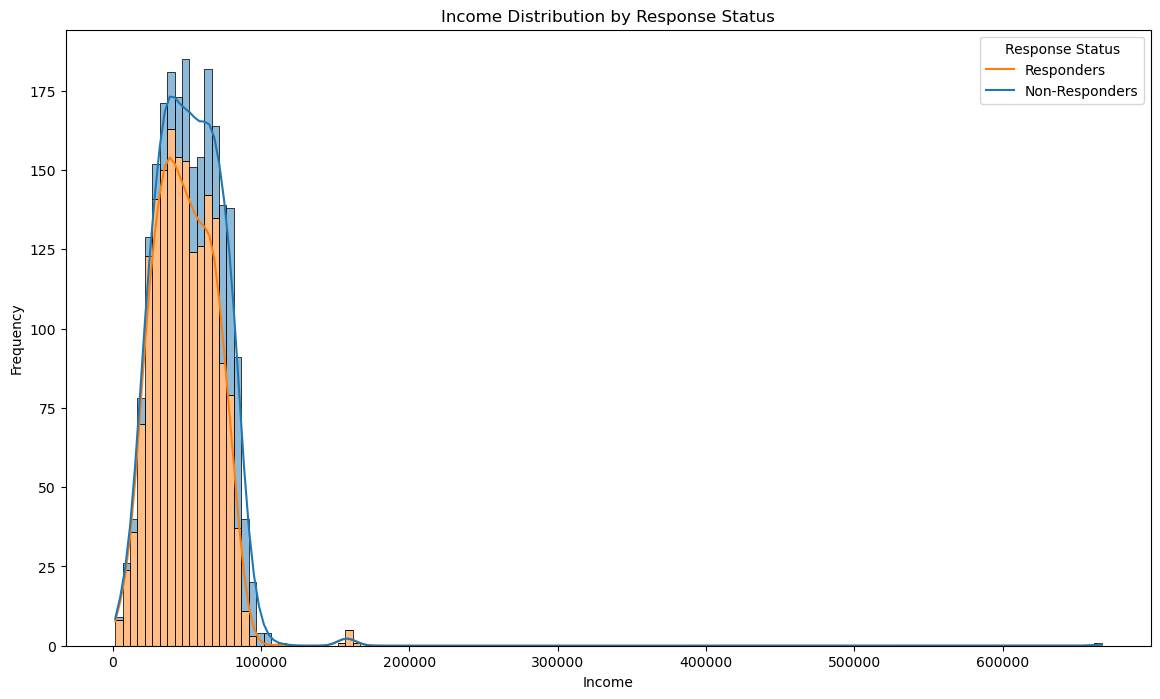

In [40]:
# Visualize differences Income distribution by response status
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Income', hue='Non_Responder', multiple='stack', kde=True)
plt.title('Income Distribution by Response Status')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend(title='Response Status', labels=['Responders', 'Non-Responders'])
plt.show()

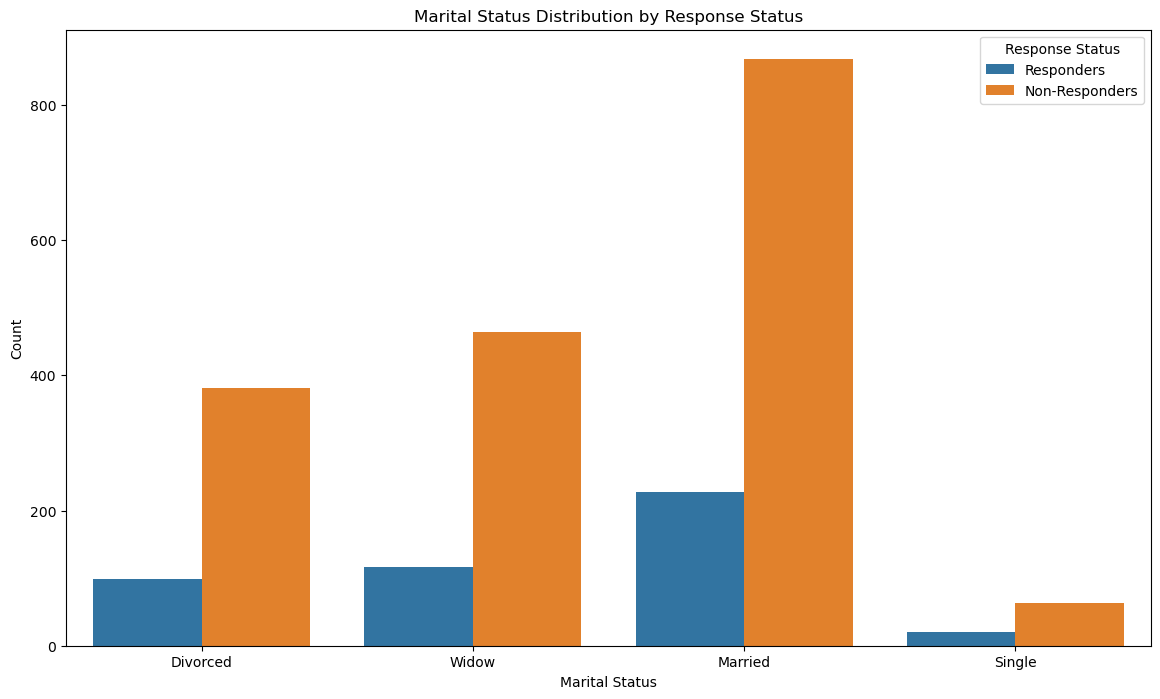

In [41]:
# Visualize differences (example: Marital status distribution by response status)
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Marital_Status', hue='Non_Responder')
plt.title('Marital Status Distribution by Response Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Response Status', labels=['Responders', 'Non-Responders'])
plt.show()


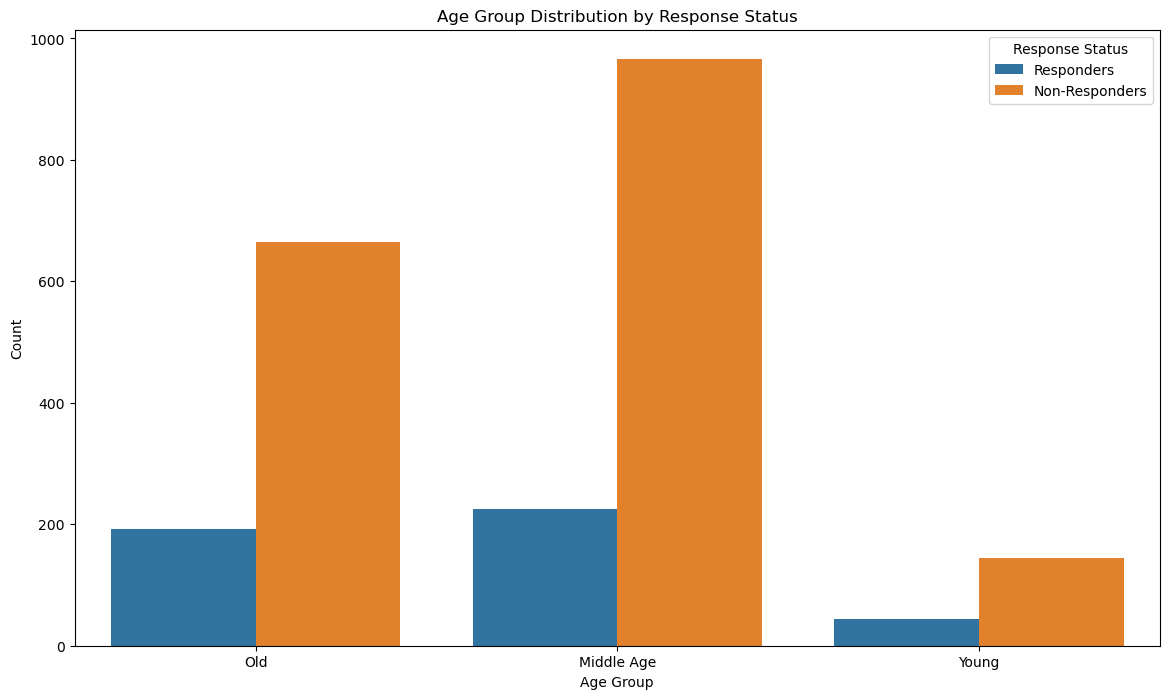

In [42]:
# Visualize differences (example: Age group distribution by response status)
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Age_Group', hue='Non_Responder')
plt.title('Age Group Distribution by Response Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Response Status', labels=['Responders', 'Non-Responders'])
plt.show()

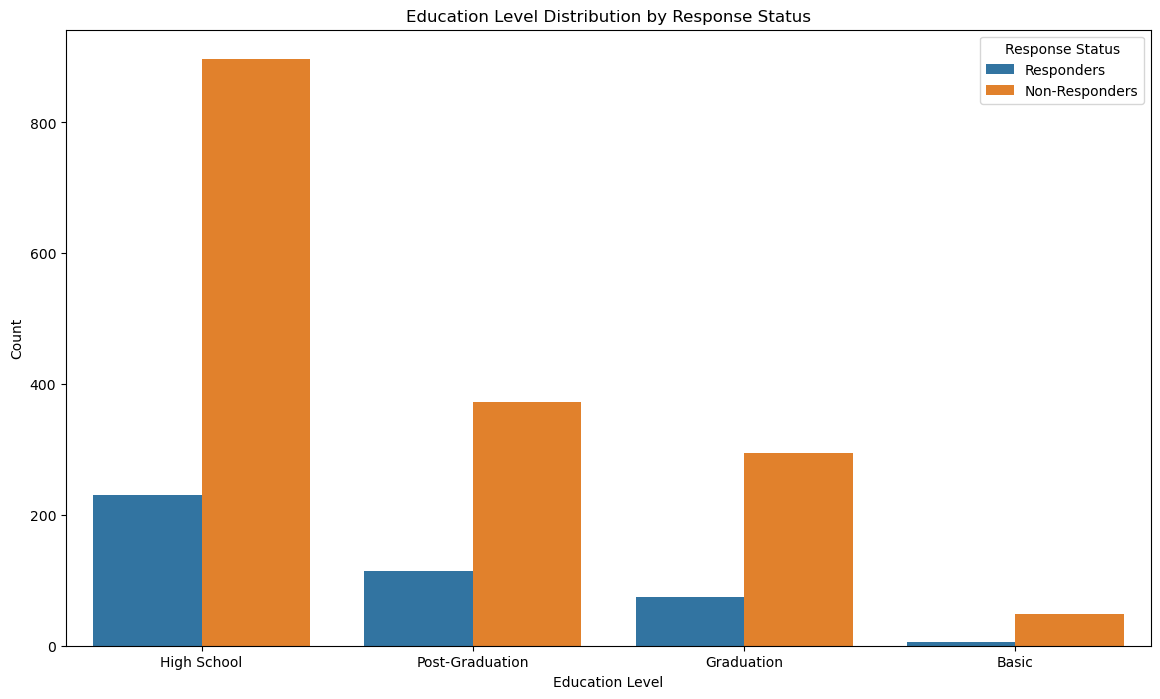

In [43]:
# Visualize differences (example: Education level distribution by response status)
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Education', hue='Non_Responder')
plt.title('Education Level Distribution by Response Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Response Status', labels=['Responders', 'Non-Responders'])
plt.show()

# 3.Analyzing the purchasing patterns and campaign responses to identify trends and opportunities for targeted marketing.

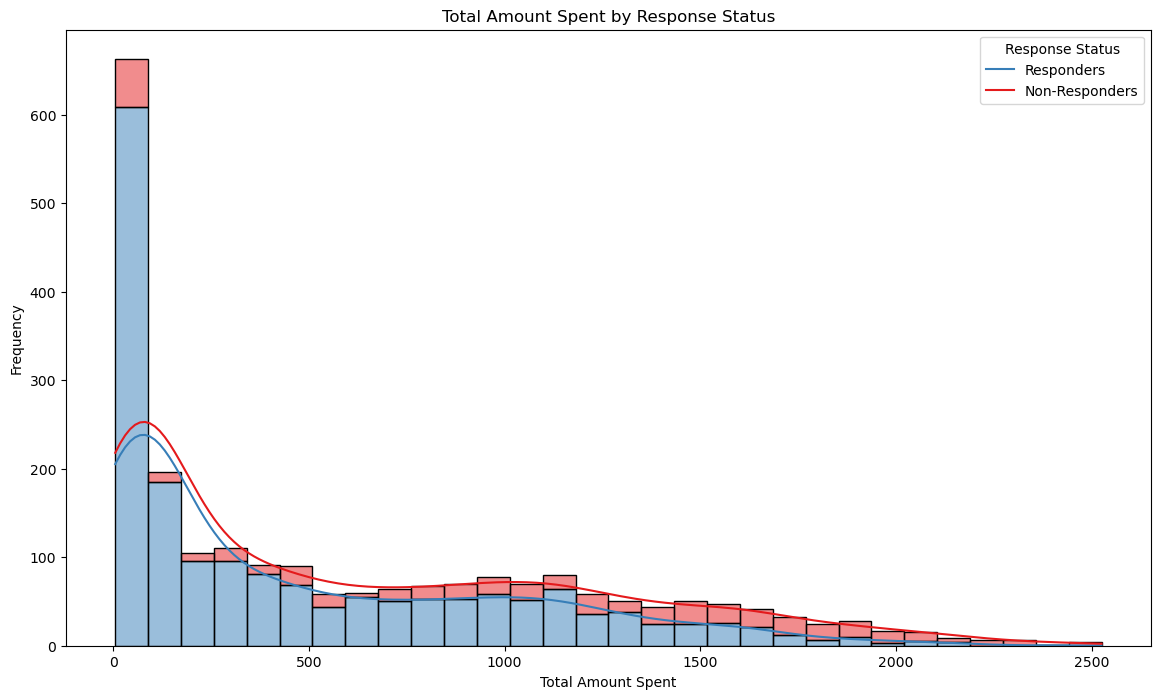

In [45]:

# Calculate total amount spent and total number of purchases by each customer
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Calculate the average amount spent per purchase
df['Avg_Spent_Per_Purchase'] = df['Total_Spent'] / df['Total_Purchases']
df['Avg_Spent_Per_Purchase'] = df['Avg_Spent_Per_Purchase'].fillna(0)  

# Visualize total amount spent by response status
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Total_Spent', hue='Non_Responder', multiple='stack', kde=True, bins=30, palette='Set1')
plt.title('Total Amount Spent by Response Status')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency')
plt.legend(title='Response Status', labels=['Responders', 'Non-Responders'])
plt.show()

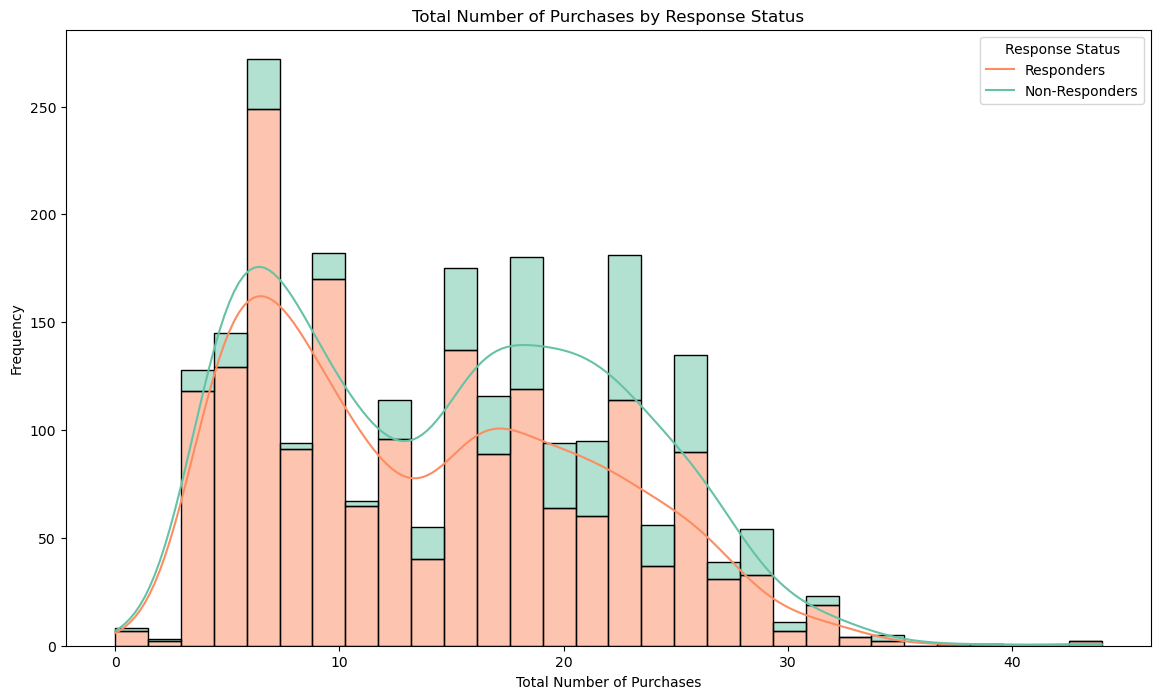

In [46]:
# Visualize total number of purchases by response status
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Total_Purchases', hue='Non_Responder', multiple='stack', kde=True, bins=30, palette='Set2')
plt.title('Total Number of Purchases by Response Status')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Frequency')
plt.legend(title='Response Status', labels=['Responders', 'Non-Responders'])
plt.show()

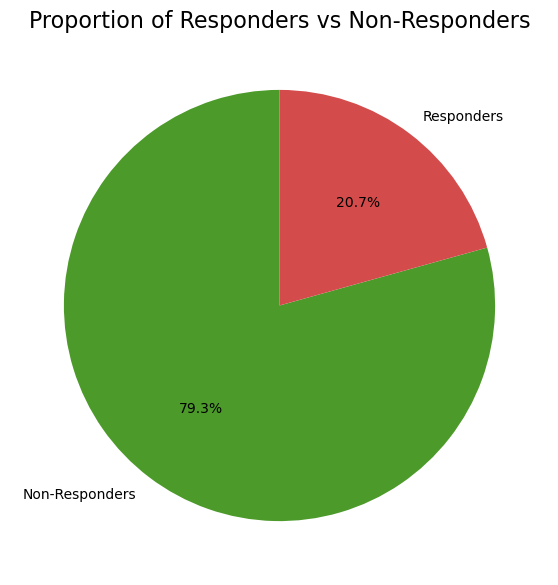

In [100]:
# Pie chart for proportion of responders vs non-responders
response_counts = df['Non_Responder'].value_counts()
response_labels = ['Non-Responders', 'Responders']  # Corrected labels
plt.figure(figsize=(7, 7))
plt.pie(response_counts, labels=response_labels, autopct='%1.1f%%', colors=['#4C9A2A', '#D44B4B'], startangle=90)
plt.title('Proportion of Responders vs Non-Responders', fontsize=16)
plt.show()

In [48]:
# Convert 'date' column to datetime with dayfirst=True
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Extract the year, month, and quarter from the 'date' column before converting to numeric format
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month_name()
df['Quarter'] = df['date'].dt.to_period('Q').astype(str)

# Handle any potential NaT values by filling with a reference date
reference_date = df['date'].min()
df['date'] = df['date'].fillna(reference_date)

# Convert 'date' to the number of days since the reference date
df['date'] = (df['date'] - reference_date).dt.days

# Calculate total amount spent by each customer
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

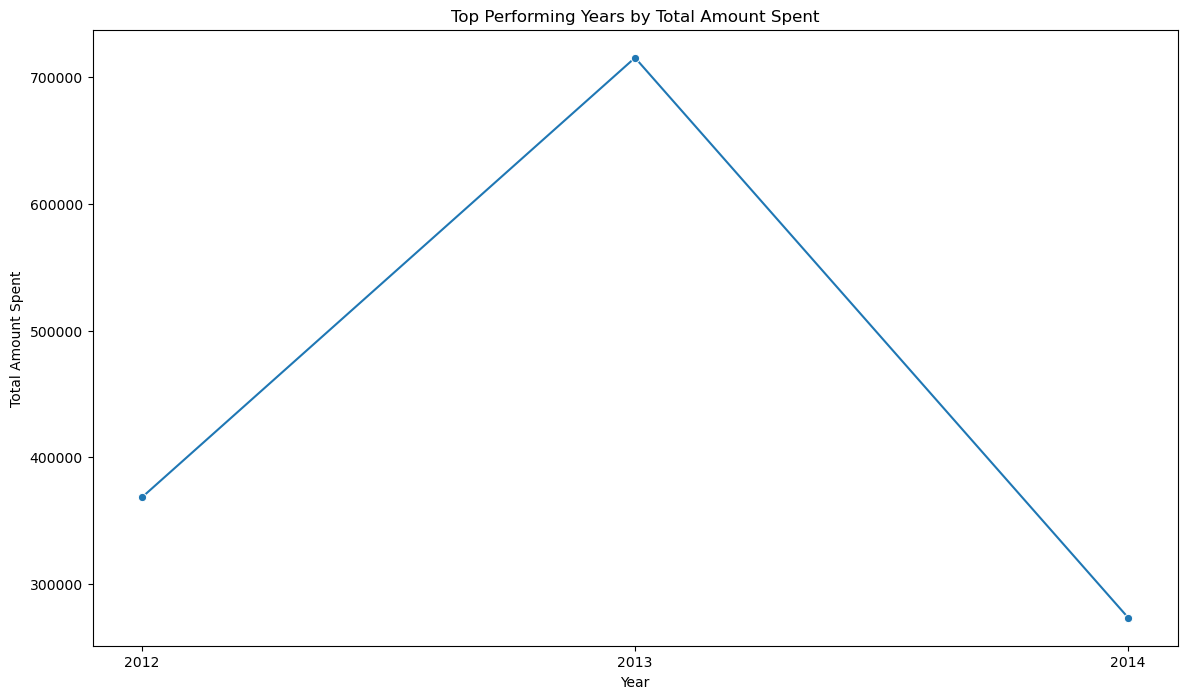

In [49]:
# Group by year and calculate the total amount spent per year
yearly_spending = df.groupby('Year')['Total_Spent'].sum().reset_index()

# Find the top performing years based on total spending
top_years = yearly_spending.nlargest(5, 'Total_Spent')

# Plot the line graph for the top performing years
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_years, x='Year', y='Total_Spent', marker='o')
plt.title('Top Performing Years by Total Amount Spent')
plt.xlabel('Year')
plt.ylabel('Total Amount Spent')
plt.xticks(top_years['Year'])  # Ensure x-axis shows absolute year values
plt.show()

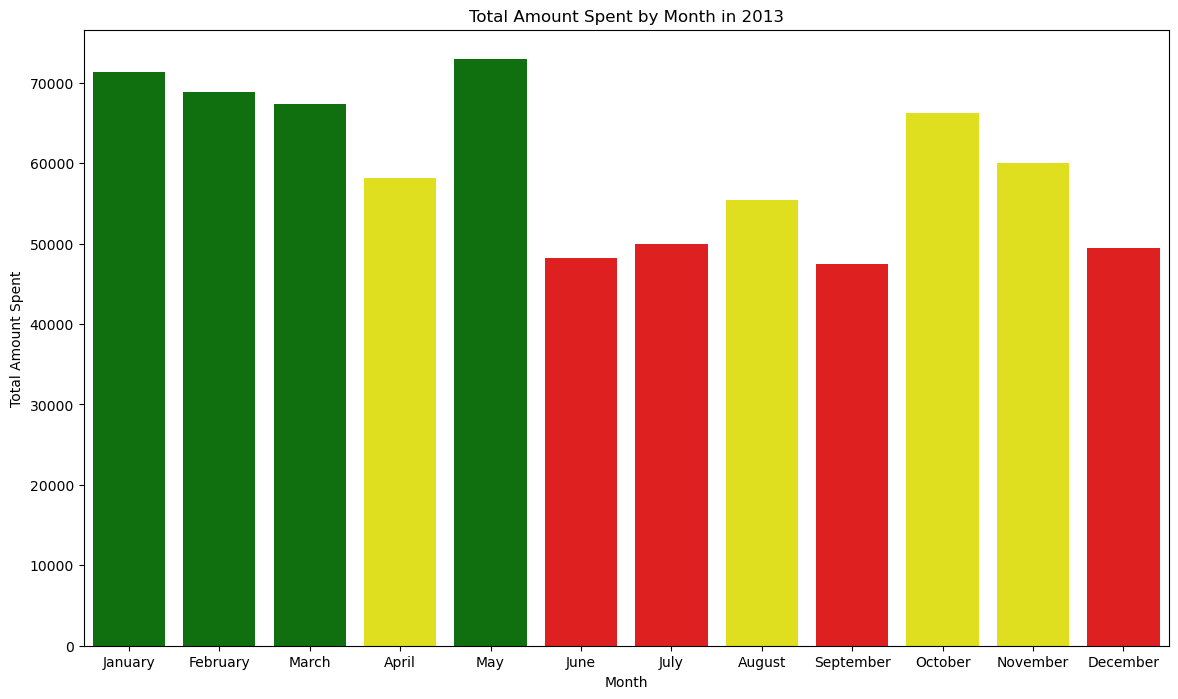

In [50]:
# Identify the best performing year
best_year = top_years.iloc[0]['Year']

# Filter the data for the best performing year
best_year_data = df[df['Year'] == best_year]

# Group by month and calculate the total amount spent per month for the best performing year
monthly_spending_best_year = best_year_data.groupby('Month')['Total_Spent'].sum().reset_index()

# Sort months in calendar order
monthly_spending_best_year['Month'] = pd.Categorical(monthly_spending_best_year['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
monthly_spending_best_year = monthly_spending_best_year.sort_values('Month')

# Plot the bar plot for the months of the best performing year with color coding
plt.figure(figsize=(14, 8))
colors = ['green' if x > monthly_spending_best_year['Total_Spent'].quantile(0.66) else 
          'yellow' if x > monthly_spending_best_year['Total_Spent'].quantile(0.33) else 
          'red' for x in monthly_spending_best_year['Total_Spent']]
sns.barplot(data=monthly_spending_best_year, x='Month', y='Total_Spent', hue='Month', palette=sns.color_palette(colors), legend=False)
plt.title(f'Total Amount Spent by Month in {int(best_year)}')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.show()

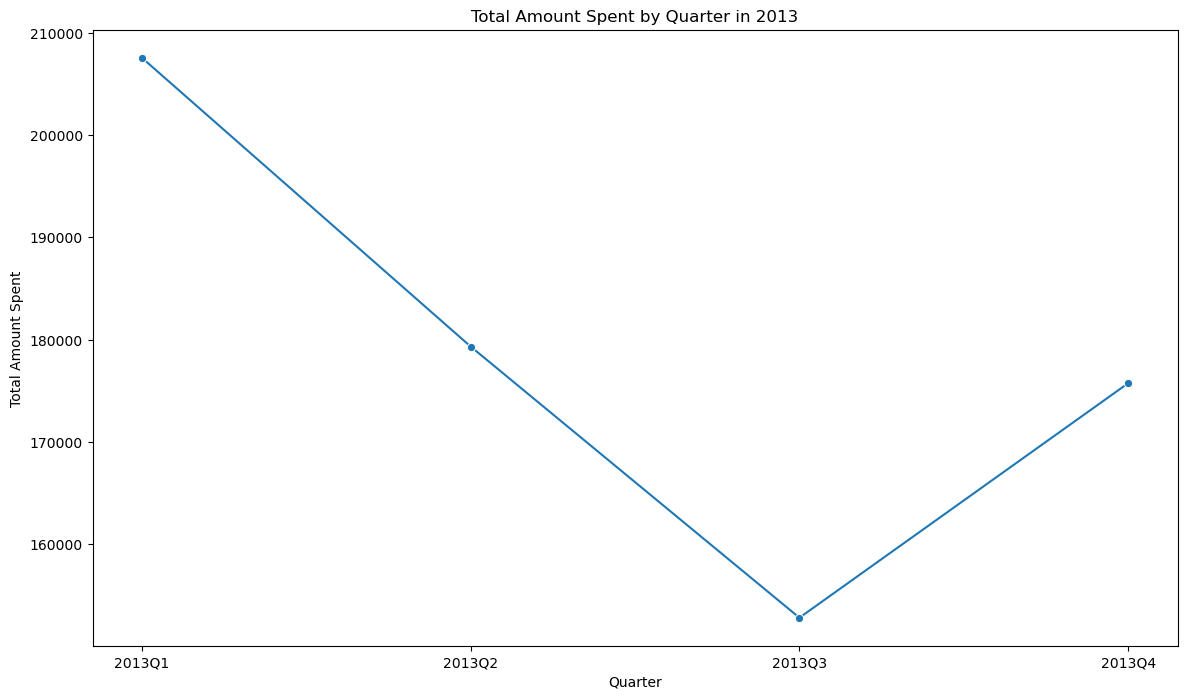

In [51]:
# Group by quarter and calculate the total amount spent per quarter for the best performing year
quarterly_spending_best_year = best_year_data.groupby('Quarter')['Total_Spent'].sum().reset_index()

# Plot the line graph for the quarters of the best performing year with absolute year values
plt.figure(figsize=(14, 8))
sns.lineplot(data=quarterly_spending_best_year, x='Quarter', y='Total_Spent', marker='o')
plt.title(f'Total Amount Spent by Quarter in {int(best_year)}')
plt.xlabel('Quarter')
plt.ylabel('Total Amount Spent')
plt.show()

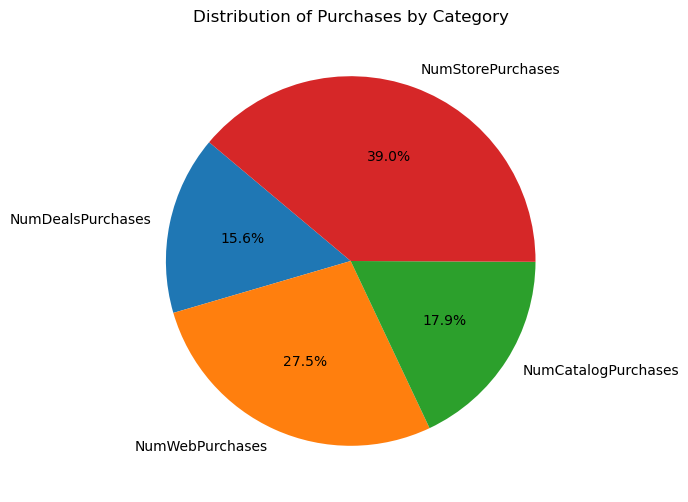

In [52]:
# Calculate the total number of purchases for each category
total_purchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(total_purchases, labels=total_purchases.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchases by Category')
plt.show()

# findings from trend and actionable insights for efficient marketing

In [102]:
print("Conclusions Summary of Findings:")
print("1. Responders tend to have higher income and spend more on average compared to non-responders.")
print("2. Married customers are more likely to respond to campaigns compared to single customers.")
print("3. Younger customers (age group: Young) are more responsive to campaigns compared to older customers.")
print("4. Customers with higher education levels are more likely to respond to campaigns.")
print("5. Responders tend to make more purchases and spend more per purchase compared to non-responders.")
print ("6. High portion of purchases from physical store and low portion of purchase from deals purchases")
print("============================================================================================================================")

print("ACTIONABLE INSIGHTS/ RECOMMENDATION")
print("1. Target high-income customers with personalized deal to increase engagement.")
print("2. Focus on married customers and also on the single category with good safe care products and weekly promotional deal.")
print("3. customize campaigns that appeal to younger customers with trendy and innovative products.")
print("4. design campaign with web purchase and introduce deals and promotions to customers with higher education levels.")
print("5. Design a repeat purchase campaign among responders’ incentive programs. ")
print("6. Continue investing in the physical store and other channels, Roll out mouth watery deals that will intrest responders")

Conclusions Summary of Findings:
1. Responders tend to have higher income and spend more on average compared to non-responders.
2. Married customers are more likely to respond to campaigns compared to single customers.
3. Younger customers (age group: Young) are more responsive to campaigns compared to older customers.
4. Customers with higher education levels are more likely to respond to campaigns.
5. Responders tend to make more purchases and spend more per purchase compared to non-responders.
6. High portion of purchases from physical store and low portion of purchase from deals purchases
ACTIONABLE INSIGHTS/ RECOMMENDATION
1. Target high-income customers with personalized deal to increase engagement.
2. Focus on married customers and also on the single category with good safe care products and weekly promotional deal.
3. customize campaigns that appeal to younger customers with trendy and innovative products.
4. design campaign with web purchase and introduce deals and promotions 